In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [2]:
import numpy as np

np.random.seed(42)

n_customers = 10000

rfm = pd.DataFrame({
    'CustomerID': range(1, n_customers + 1),
    'Recency': np.random.randint(1, 366, n_customers),      # 1–365 din
    'Frequency': np.random.randint(1, 21, n_customers),     # 1–20 orders
    'Monetary': np.random.uniform(10, 2000, n_customers).round(2)  # 10–2000 paisa
})

rfm.head()


,CustomerID,Recency,Frequency,Monetary
0,1,103,18,1895.57
1,2,349,12,92.13
2,3,271,16,1838.52
3,4,107,5,1222.07
4,5,72,20,1616.56


In [3]:
features = rfm[['Recency', 'Frequency', 'Monetary']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=4, n_init=10, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(X_scaled)

rfm['Cluster'].value_counts()


Cluster
3    2550
2    2537
1    2488
0    2425
Name: count, dtype: int64

In [4]:
cluster_profile = rfm.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean().round(1)
cluster_profile


,Recency,Frequency,Monetary
Cluster,,,
0,261.3,12.1,452.3
1,92.8,15.8,1138.7
2,103.7,4.9,927.7
3,273.1,10.0,1540.3


In [5]:
segment_names = {
    0: 'High-Value Loyal',
    1: 'At-Risk High-Value',
    2: 'New/Potential',
    3: 'Low-Value/Churned'
}

rfm['Segment'] = rfm['Cluster'].map(segment_names)
rfm[['CustomerID', 'Recency', 'Frequency', 'Monetary', 'Segment']].head()


,CustomerID,Recency,Frequency,Monetary,Segment
0,1,103,18,1895.57,At-Risk High-Value
1,2,349,12,92.13,High-Value Loyal
2,3,271,16,1838.52,Low-Value/Churned
3,4,107,5,1222.07,New/Potential
4,5,72,20,1616.56,At-Risk High-Value


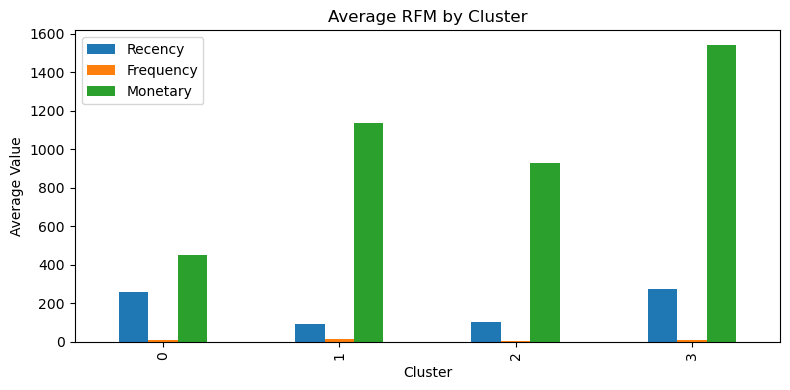

In [6]:
cluster_profile.plot(kind='bar', figsize=(8,4))
plt.title('Average RFM by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Value')
plt.tight_layout()
plt.show()
